### Student Information
Name: 呂志娟 Chih-Chuan Lu

Student ID: 106061525

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

### Prerequisite

In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functionsb
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

## Data Preparation

### Load data and concatenate them all in one

In [37]:
raw1 = pd.read_table('data/amazon_cells_labelled.txt', header=None, names=['text', 'category'])
raw2 = pd.read_table('data/imdb_labelled.txt', header=None, names=['text', 'category'], sep='  \t', engine='python')
raw3 = pd.read_table('data/yelp_labelled.txt', header=None, names=['text', 'category'])

In [48]:
print(len(raw1), len(raw2), len(raw3))

1000 1000 1000


In [130]:
raw = pd.concat([raw1, raw2, raw3])
raw = raw.reset_index(drop=True)

In [135]:
categories = raw['category'].unique()

### Investigate the data

In [44]:
raw[:10]

,text,category
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [45]:
raw.iloc[::10, :][0:10]    # Sampling at each 10 records and display first 10 results

,text,category
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


#### Exercise 0
Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [62]:
raw.text[:10]    # Access records for 'text' attribute

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: text, dtype: object

In [70]:
raw['text'][:-20:-2]    # get only 'text' attributes of last 20 records and sample at each 2 records and inverse them

2999    Then, as if I hadn't wasted enough of my life ...
2997    Overall I was not impressed and would not go b...
2995    I think food should have flavor and texture an...
2993              the presentation of the food was awful.
2991           Spend your money and time some place else.
2989    I would avoid this place if you are staying in...
2987       It lacked flavor, seemed undercooked, and dry.
2985    The problem I have is that they charge $11.99 ...
2983    It sure does beat the nachos at the movies but...
2981    We started with the tuna sashimi which was bro...
Name: text, dtype: object

## Data Mining

### Missing Value

In [78]:
raw.isnull()

,text,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [81]:
raw.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amount of missing value is: , 0)
category    (The amount of missing value is: , 0)
dtype: object

#### Exercise 1
Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.

In [82]:
raw.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)    # compute missing value amount through records

0       (The amount of missing value is: , 0)
1       (The amount of missing value is: , 0)
2       (The amount of missing value is: , 0)
3       (The amount of missing value is: , 0)
4       (The amount of missing value is: , 0)
5       (The amount of missing value is: , 0)
6       (The amount of missing value is: , 0)
7       (The amount of missing value is: , 0)
8       (The amount of missing value is: , 0)
9       (The amount of missing value is: , 0)
10      (The amount of missing value is: , 0)
11      (The amount of missing value is: , 0)
12      (The amount of missing value is: , 0)
13      (The amount of missing value is: , 0)
14      (The amount of missing value is: , 0)
15      (The amount of missing value is: , 0)
16      (The amount of missing value is: , 0)
17      (The amount of missing value is: , 0)
18      (The amount of missing value is: , 0)
19      (The amount of missing value is: , 0)
20      (The amount of missing value is: , 0)
21      (The amount of missing val

In [89]:
dummy_series = pd.Series(["dummy_record from series"], index=["text"])

In [90]:
dummy_series

text    dummy_record
dtype: object

In [91]:
result_with_dummy = raw.append(dummy_series, ignore_index=True)

In [92]:
len(result_with_dummy)

3001

In [94]:
result_with_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amount of missing value is: , 0)
category    (The amount of missing value is: , 1)
dtype: object

In [100]:
dummy_dict = [{'text': 'dummy_record from dict'}]

In [101]:
raw = raw.append(dummy_dict, ignore_index=True)

In [102]:
len(raw)

3002

In [103]:
raw.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amount of missing value is: , 0)
category    (The amount of missing value is: , 1)
dtype: object

In [104]:
raw.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amount of missing value is: , 0)
1       (The amount of missing value is: , 0)
2       (The amount of missing value is: , 0)
3       (The amount of missing value is: , 0)
4       (The amount of missing value is: , 0)
5       (The amount of missing value is: , 0)
6       (The amount of missing value is: , 0)
7       (The amount of missing value is: , 0)
8       (The amount of missing value is: , 0)
9       (The amount of missing value is: , 0)
10      (The amount of missing value is: , 0)
11      (The amount of missing value is: , 0)
12      (The amount of missing value is: , 0)
13      (The amount of missing value is: , 0)
14      (The amount of missing value is: , 0)
15      (The amount of missing value is: , 0)
16      (The amount of missing value is: , 0)
17      (The amount of missing value is: , 0)
18      (The amount of missing value is: , 0)
19      (The amount of missing value is: , 0)
20      (The amount of missing value is: , 0)
21      (The amount of missing val

In [106]:
raw.dropna(inplace=True)

In [107]:
raw.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amount of missing value is: , 0)
category    (The amount of missing value is: , 0)
dtype: object

In [111]:
len(raw)

3000

### Duplicate data

In [120]:
# dumplicated() function can help us find duplicated records
# and the 'keep=False' means that we want all duplicated records saved for counting
sum(raw.duplicated(keep=False))

36

In [121]:
# For example, we can see record pairs (187, 285) and (262, 407) have the same text content.
raw[raw.duplicated(keep=False)]

,text,category
18,Works great!.,1.0
179,If you like a loud buzzing to override all you...,0.0
180,Don't buy this product.,0.0
187,Great phone!.,1.0
262,Works great.,1.0
285,Great phone!.,1.0
290,Great Phone.,1.0
337,Very disappointing.,0.0
392,This is a great deal.,1.0
402,Excellent product for the price.,1.0


In [123]:
raw.drop_duplicates(keep='first', inplace=True)    # drop duplicated records that appear afterward

In [124]:
len(raw)

2982

## Data Preprocessing

### Sampling

In [171]:
raw_sampled = raw.sample(n=1000)

In [172]:
len(raw_sampled)

1000

In [173]:
raw_sampled[:5]

,text,category
950,It is a joy to use.,1
1323,"The ending is so, SO perfect... you'll shed a ...",1
1021,"In other words, the content level of this film...",1
271,Worked perfectly!,1
706,So anyone near you will hear part of your conv...,0


In [178]:
cat_count = ta.get_tokens_and_frequency(list(raw.category))
cat_count_sampled = ta.get_tokens_and_frequency(list(raw_sampled.category))

In [179]:
cat_count_sampled

(odict_keys([1, 0]), odict_values([501, 499]))

In [180]:
py.iplot(ta.plot_word_frequency(cat_count, "Category distribution"))

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [ ]:
py.iplot(ta.plot_word_frequency(cat_count_sampled, "Category distribution"))

#### Exercise 2
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.


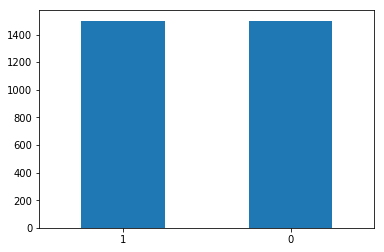

In [145]:
raw.category.value_counts().plot(kind="bar", rot=0)

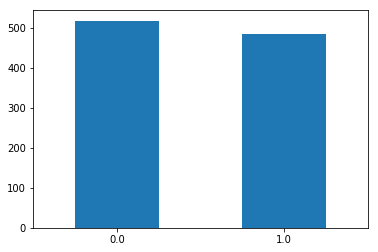

In [148]:
raw_sampled.category.value_counts().plot(kind="bar", rot=0)

### Feature Creation

In [186]:
raw['unigrams'] = raw['text'].apply(lambda x: dmh.tokenize_text(x))

In [188]:
raw[0:10]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
5    [I, have, to, jiggle, the, plug, to, get, it, ...
6    [If, you, have, several, dozen, or, several, h...
7    [If, you, are, Razr, owner, ..., you, must, ha...
8      [Needless, to, say, ,, I, wasted, my, money, .]
9         [What, a, waste, of, money, and, time, !, .]
Name: unigrams, dtype: object

In [193]:
print(list(raw[0:1]['unigrams']))

[['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.']]


In [195]:
count_vect = CountVectorizer()
tf = count_vect.fit_transform(raw.text)

In [207]:
# check the shape of the term frequency matrix
tf.shape

(3000, 5155)

In [199]:
analyze = count_vect.build_analyzer()
analyze(" ".join(raw[4:5].text))

['the', 'mic', 'is', 'great']

In [201]:
" ".join(raw[4:5].text)

'The mic is great.'

In [213]:
# examine the first 10 term in list
count_vect.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [214]:
# examine the last 10 term in list
count_vect.get_feature_names()[-10:]

['yucky',
 'yukon',
 'yum',
 'yummy',
 'yun',
 'z500a',
 'zero',
 'zillion',
 'zombie',
 'zombiez']

In [211]:
# show the fist little part of the tf matrix, and found it's pretty sparse
tf[0:5,0:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [210]:
# The sentence 'Somthing new.' has none of the first or last three terms in term list
count_vect.transform(['Something new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [216]:
# '00' and 'zombie' correspond to first and last term in term list
# so the result should found 1 appear at position 0 and 2 appear at position -1
count_vect.transform(['00 zombiez zombiez Something new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 2]])

In [217]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [218]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [220]:
plot_y = ["doc_"+ str(i) for i in list(raw.index)[0:20]]

In [221]:
plot_z = tf[0:20, 0:20].toarray()

In [222]:
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

#### Exercise 3
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

### Dimensionality Reduction